In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy import optimize as opt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
sample = pd.read_csv('data/part2data1.txt', names=['Exam1', 'Exam2', 'Pass'])
sample.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# Visualization

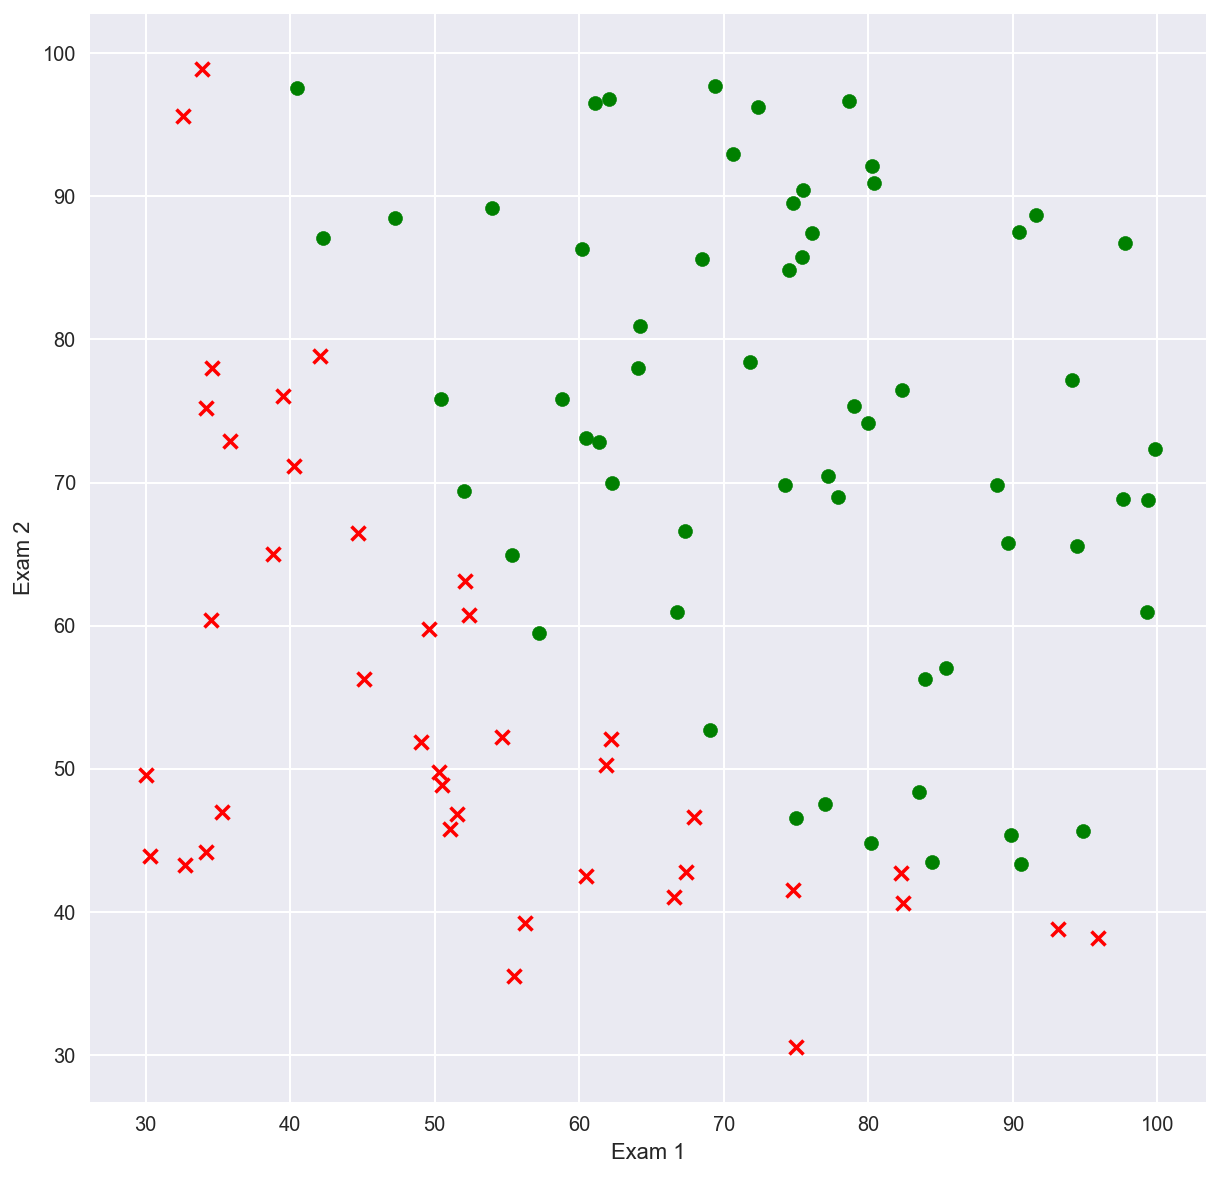

In [4]:
a = sample[ sample['Pass'] == 1 ]
b = sample[ sample['Pass'] == 0 ]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(a.ix[:, 0], a.ix[:, 1], marker='o', c='g')
ax.scatter(b.ix[:, 0], b.ix[:, 1], marker='x', c='r')
ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')

# Logistic Regression
### sigmoid function
$f(x)=\frac{1}{1+e^{-x}}$

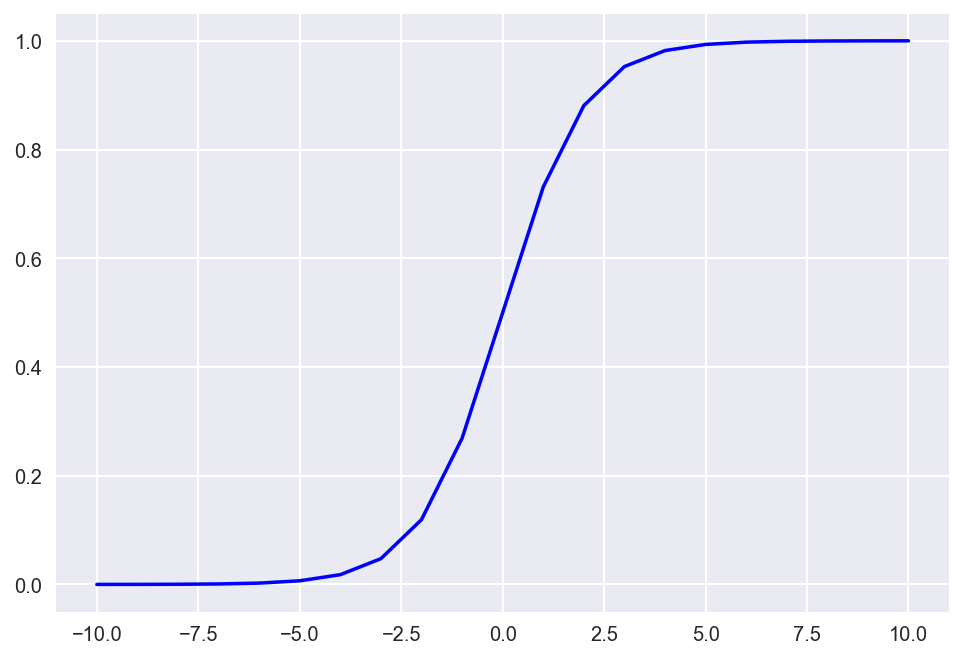

In [5]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

tempX = np.array(range(-10,11))
tempY = list( map(sigmoid, tempX) )
plt.plot(tempX, tempY, 'b')

### add 'Ones'

In [6]:
data = sample.copy()
data.insert(0, 'Ones', 1)
theta = np.zeros(3)

x = data.ix[:, :-1]
y = data.ix[:, -1:]
x

,Ones,Exam1,Exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376
5,1,45.083277,56.316372
6,1,61.106665,96.511426
7,1,75.024746,46.554014
8,1,76.098787,87.420570
9,1,84.432820,43.533393


### Cost function
$$J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))]$$

In [7]:
def cost(theta, x, y):
    x = np.matrix(x)
    y = np.matrix(y)
    m = len(x)
    sigma = np.multiply(-y, np.log(sigmoid(x * np.matrix(theta).T))) - np.multiply((1 - y), np.log(1 - sigmoid(x * np.matrix(theta).T)))
    return np.sum(sigma) / m

### Minimize cost function using 'scipy' and 'nelder-mead' algorithm

In [13]:
x0 = np.array([0, 0, 0])
res = opt.minimize(cost, x0, method='nelder-mead', args=(x, y), options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 210
         Function evaluations: 398


array([-25.16133328,   0.20623171,   0.2014716 ])

In [9]:
cost([-25.16133328,   0.20623171,   0.2014716 ], x, y)

0.20349770158944025

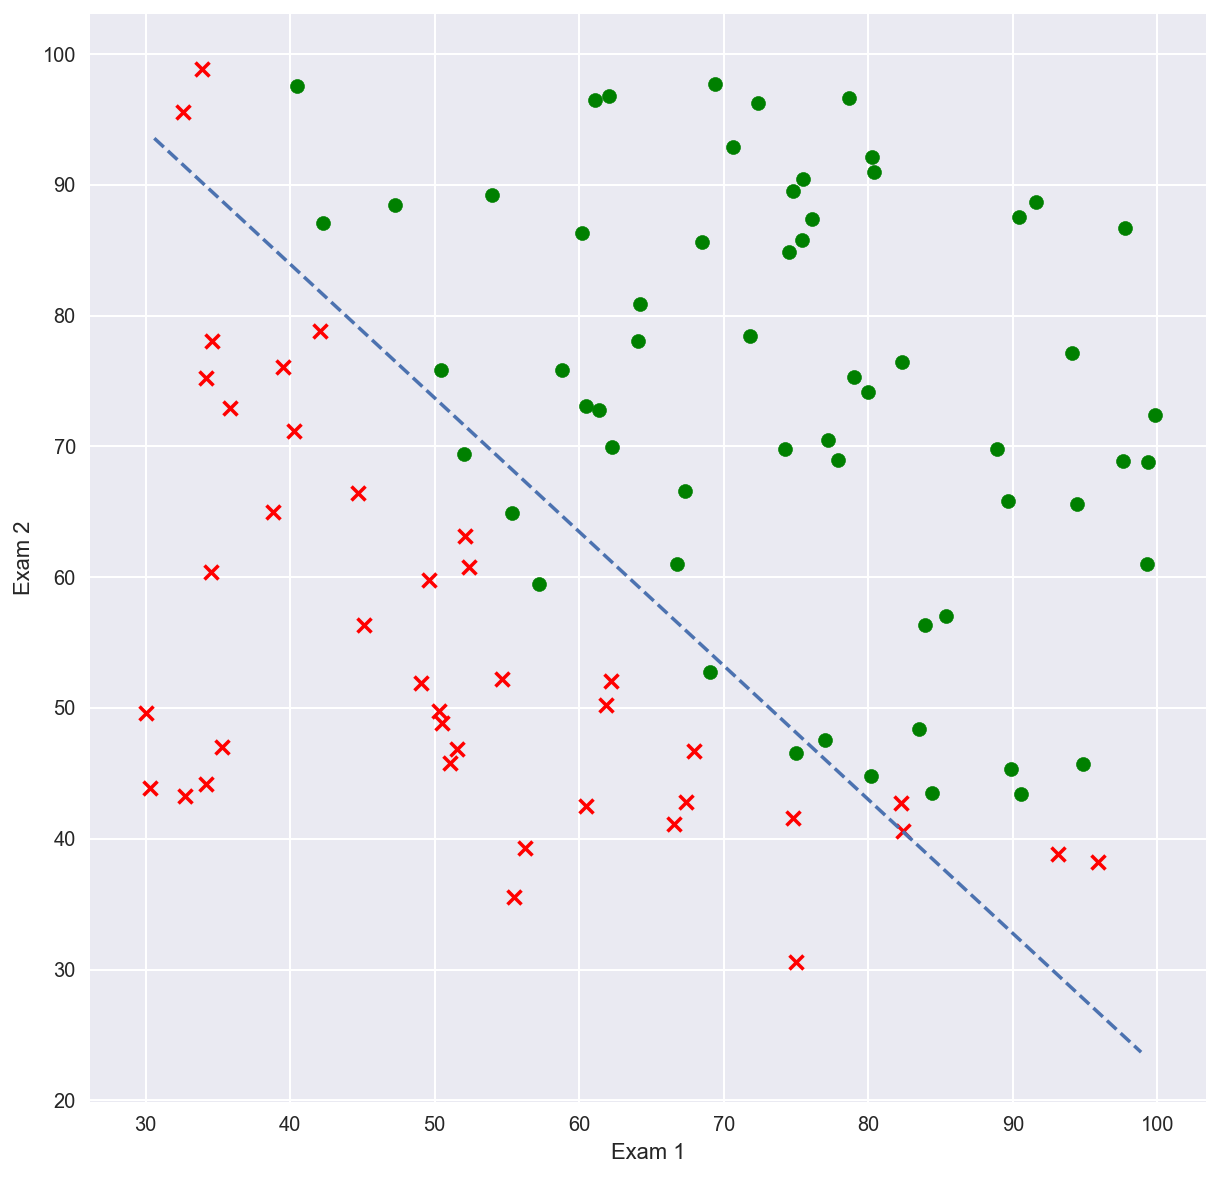

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(a.ix[:, 0], a.ix[:, 1], marker='o', c='g')
ax.scatter(b.ix[:, 0], b.ix[:, 1], marker='x', c='r')

plot_x = np.array([min(x.ix[:,2]),  max(x.ix[:,2])])
plot_y = (-1./res.x[2])*(res.x[1]*plot_x + res.x[0])
ax.plot(plot_x,plot_y, '--')

ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')

#  ارزیابی رگرسیون لجسیتک

In [10]:
def passProbability(theta, exam1, exam2):
    tmp = np.array([1,exam1,exam2])
    return sigmoid( np.dot(tmp, theta) )

passProbability(res.x, 45, 85)

0.77629069244123083

In [11]:
def predict(theta, X):
    X.insert(0, 'Ones', 1)
    probability = sigmoid( np.dot( np.array(X), theta.T) )
    return [True if x >= 0.5 else False for x in probability]

In [12]:
predict(res.x, sample[ ['Exam1', 'Exam2'] ])

[False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True]